In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-depression-dataset/data/scores.csv
/kaggle/input/the-depression-dataset/data/condition/condition_20.csv
/kaggle/input/the-depression-dataset/data/condition/condition_2.csv
/kaggle/input/the-depression-dataset/data/condition/condition_16.csv
/kaggle/input/the-depression-dataset/data/condition/condition_23.csv
/kaggle/input/the-depression-dataset/data/condition/condition_18.csv
/kaggle/input/the-depression-dataset/data/condition/condition_8.csv
/kaggle/input/the-depression-dataset/data/condition/condition_1.csv
/kaggle/input/the-depression-dataset/data/condition/condition_22.csv
/kaggle/input/the-depression-dataset/data/condition/condition_5.csv
/kaggle/input/the-depression-dataset/data/condition/condition_19.csv
/kaggle/input/the-depression-dataset/data/condition/condition_13.csv
/kaggle/input/the-depression-dataset/data/condition/condition_15.csv
/kaggle/input/the-depression-dataset/data/condition/condition_21.csv
/kaggle/input/the-depression-dataset/data/condition/co

# Depression Analysis
Depression alone affects more than 300 million people worldwide and is one of the largest cause of disability worldwide, particularly for women.

It is characterized by sadness, loss of weight, loss of interest, suicide attempts etc.

Body sensors have long being used to monitor personal health. This sensors store vast amount of data which holds the potential of measuring the quantity of daily steps, calories burned, continuous recordings of heart rate and activity level.

Dealing with depression can be very demanding and creates a lot of physical, economical and emotional problems.

Depression is characterized by reduced day time activity and increased night time activity

The dataset collected used in this analysis is public available. The dataset was originally collected for the study of motor activity in schizophrenia and major depression. Motor activity was monitored with an actigraph watch worn at the right wrist (Actiwatch, Cambridge Neurotechnology Ltd, England, model AW4). The actigraph watch measures activity levels. The sampling frequency is 32Hz and movements over 0.05 g are recorded. A corresponding voltage is produced and is stored as an activity count in the memory unit of the actigraph watch.

The number of counts is proportional to the intensity of the movement. Total activity counts were continuously recorded in one minute intervals. This dataset consists of actigraphy data collected from 23 unipolar and bipolar depressed patients (condition group), 5 subjects were hospitalized during their data collection period, and 18 were outpatients. The severity level of the ongoing depression was rated by a clinician on the Montgomery- Asberg Depression Rating Scale (MADRS) at the beginning and conclusion of the motor-activity recordings.

In addition, the dataset contains actigraphy data from 32 non-depressed contributors (control group), consisting of 23 hospital employees, 5 students and 4 former patients without current psychiatric symptoms.

In [34]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
control_1 = pd.read_csv('/kaggle/input/the-depression-dataset/data/control/control_1.csv')
condition_1 = pd.read_csv('/kaggle/input/the-depression-dataset/data/condition/condition_1.csv')
print(f'control_1.shape {control_1.shape}')
print(f'condition_1.shape {condition_1.shape}')

control_1.shape (51611, 3)
condition_1.shape (23244, 3)


In [4]:
control_1.head()

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264
3,2003-03-18 15:03:00,2003-03-18,662
4,2003-03-18 15:04:00,2003-03-18,293


In [5]:
condition_1.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [6]:
condition_1.describe()

,activity
count,23244.000000
mean,146.948030
std,294.592424
min,0.000000
25%,0.000000
50%,9.000000
75%,172.000000
max,3526.000000


<AxesSubplot:xlabel='activity', ylabel='Count'>

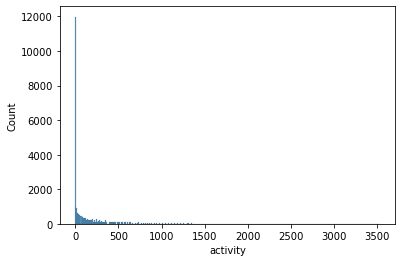

In [7]:
sns.histplot(x='activity', data=condition_1)

In [8]:
condition_1['activity'].skew()

3.8823677090908344

From the above graph, it can be seen that there is high level of skewness. An alternative is taking the log or square root of activity

In [9]:
condition_1['log_activity'] = np.log(condition_1['activity']+1)
condition_1['log_activity'].skew()

0.2771381485812395

In [10]:
condition_1

,timestamp,date,activity,log_activity
0,2003-05-07 12:00:00,2003-05-07,0,0.000000
1,2003-05-07 12:01:00,2003-05-07,143,4.969813
2,2003-05-07 12:02:00,2003-05-07,0,0.000000
3,2003-05-07 12:03:00,2003-05-07,20,3.044522
4,2003-05-07 12:04:00,2003-05-07,166,5.117994
...,...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0,0.000000
23240,2003-05-23 15:20:00,2003-05-23,0,0.000000
23241,2003-05-23 15:21:00,2003-05-23,0,0.000000
23242,2003-05-23 15:22:00,2003-05-23,0,0.000000


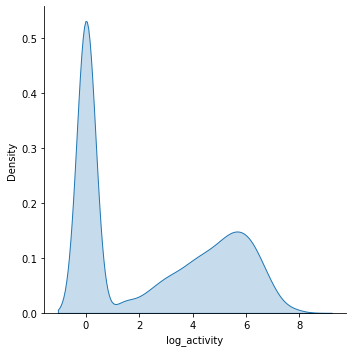

In [11]:
sns.displot(x='log_activity', data=condition_1, kind='kde', fill=True)

In [12]:
condition_1['sqrt_activity'] = np.sqrt(condition_1['activity'])
condition_1['sqrt_activity'].skew()

1.370447546298057

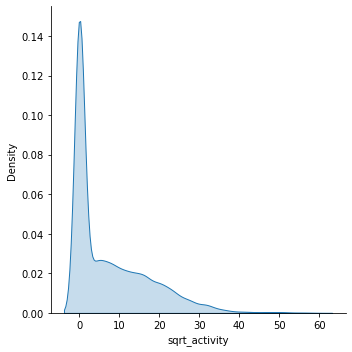

In [13]:
sns.displot(x='sqrt_activity', data=condition_1, kind='kde', fill=True)

In [14]:
condition_1.describe()

,activity,log_activity,sqrt_activity
count,23244.000000,23244.000000,23244.000000
mean,146.948030,2.562035,7.416512
std,294.592424,2.626393,9.588917
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,9.000000,2.302585,3.000000
75%,172.000000,5.153292,13.114877
max,3526.000000,8.168203,59.380131


In [15]:
control_1['activity'].skew()

5.039169993104665

In [16]:
control_1.describe()

,activity
count,51611.000000
mean,98.545078
std,289.655317
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,6117.000000


In [17]:
control_1['log_activity'] = np.log(control_1['activity']+1)
control_1['log_activity'].skew()

1.2517081703386566

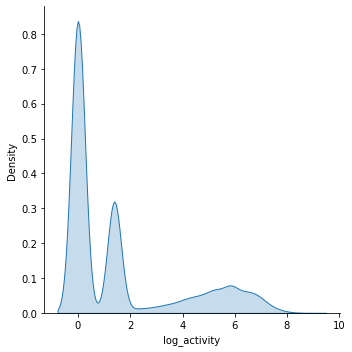

In [18]:
sns.displot(x='log_activity', data=control_1, kind='kde', fill=True)

In [19]:
condition_1.head()

,timestamp,date,activity,log_activity,sqrt_activity
0,2003-05-07 12:00:00,2003-05-07,0,0.000000,0.000000
1,2003-05-07 12:01:00,2003-05-07,143,4.969813,11.958261
2,2003-05-07 12:02:00,2003-05-07,0,0.000000,0.000000
3,2003-05-07 12:03:00,2003-05-07,20,3.044522,4.472136
4,2003-05-07 12:04:00,2003-05-07,166,5.117994,12.884099


In [20]:
df = condition_1.groupby('date')['log_activity'].mean().reset_index()
df.head()

,date,log_activity
0,2003-05-07,3.752204
1,2003-05-08,2.931977
2,2003-05-09,2.593095
3,2003-05-10,2.910573
4,2003-05-11,2.561446


# Time Series Analysis

In [21]:
def combine_data(path):
    dirs = os.listdir(path)
    combine_df = []
    
    for filepath in dirs:
        source = filepath.split('.')[0]
        if filepath.endswith('.csv'):
            X = pd.read_csv(path + filepath, parse_dates=['timestamp'], index_col='timestamp')
            X['source'] = source
            combine_df.append(X)
            
    return combine_df

In [22]:
combine_df = combine_data('/kaggle/input/the-depression-dataset/data/condition/')

In [23]:
conditions = []
for condition in combine_df:
    condition_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    condition_df['mean_activity'] = condition.activity.resample('H').mean()
    condition_df['std_activity'] = condition.activity.resample('H').std()
    condition_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
    condition_df['source'] = condition.source
    conditions.append(condition_df)

In [24]:
combine_df = combine_data('/kaggle/input/the-depression-dataset/data/control/')

In [25]:
controls = []
for control in combine_df:
    control_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    control_df['mean_activity'] = control.activity.resample('H').mean()
    control_df['std_activity'] = control.activity.resample('H').std()
    control_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in control.activity.resample('H')]
    control_df['source'] = control.source
    controls.append(control_df)

In [27]:
control_df

,mean_activity,std_activity,zero_activity_proportion,source
timestamp,,,,
2003-11-18 09:00:00,6.200000,18.821012,13,control_10
2003-11-18 10:00:00,3.233333,1.807392,0,control_10
2003-11-18 11:00:00,92.066667,214.908721,31,control_10
2003-11-18 12:00:00,128.066667,271.600583,18,control_10
2003-11-18 13:00:00,502.366667,539.868344,0,control_10
...,...,...,...,...
2003-12-03 05:00:00,0.000000,0.000000,60,control_10
2003-12-03 06:00:00,0.000000,0.000000,60,control_10
2003-12-03 07:00:00,0.000000,0.000000,60,control_10


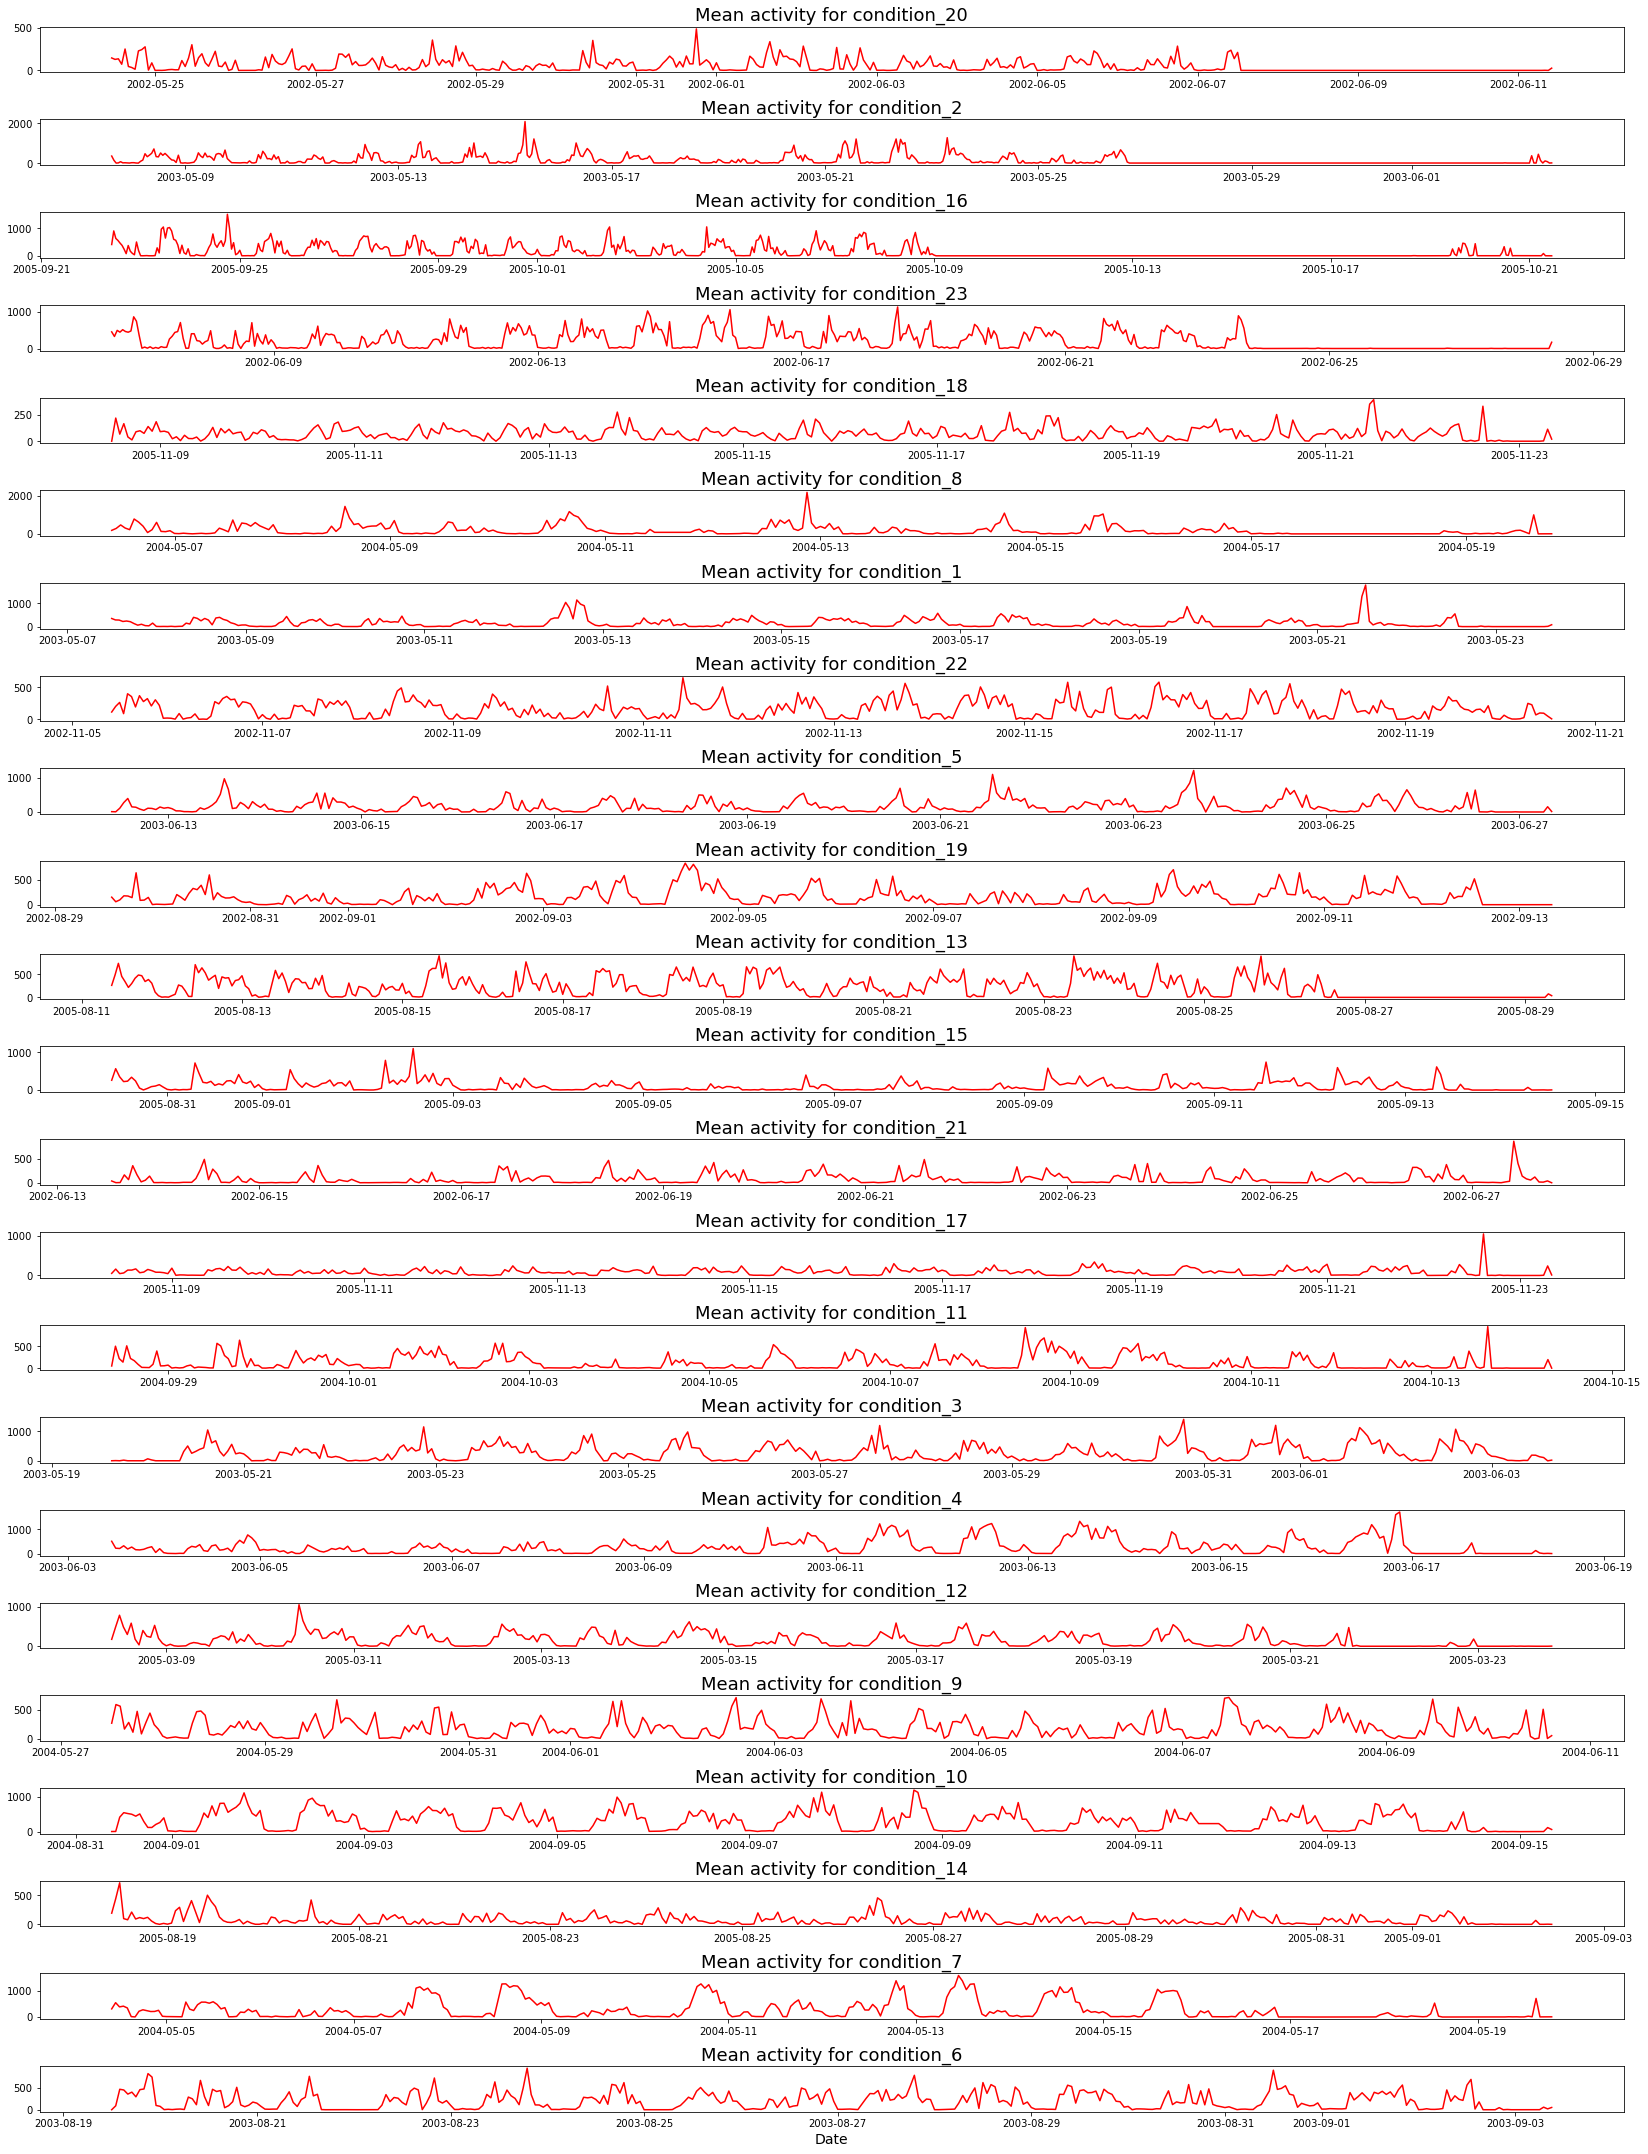

In [26]:
fig, axes = plt.subplots(23, 1, figsize=(23, 30))
cnt = 0
for i in range(23):
    condition = conditions[cnt]
    axes[i].plot(condition.index, condition.mean_activity, color='r')
    axes[i].set_title(f'Mean activity for {condition.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of condition group.jpg', dpi=100)
plt.show()

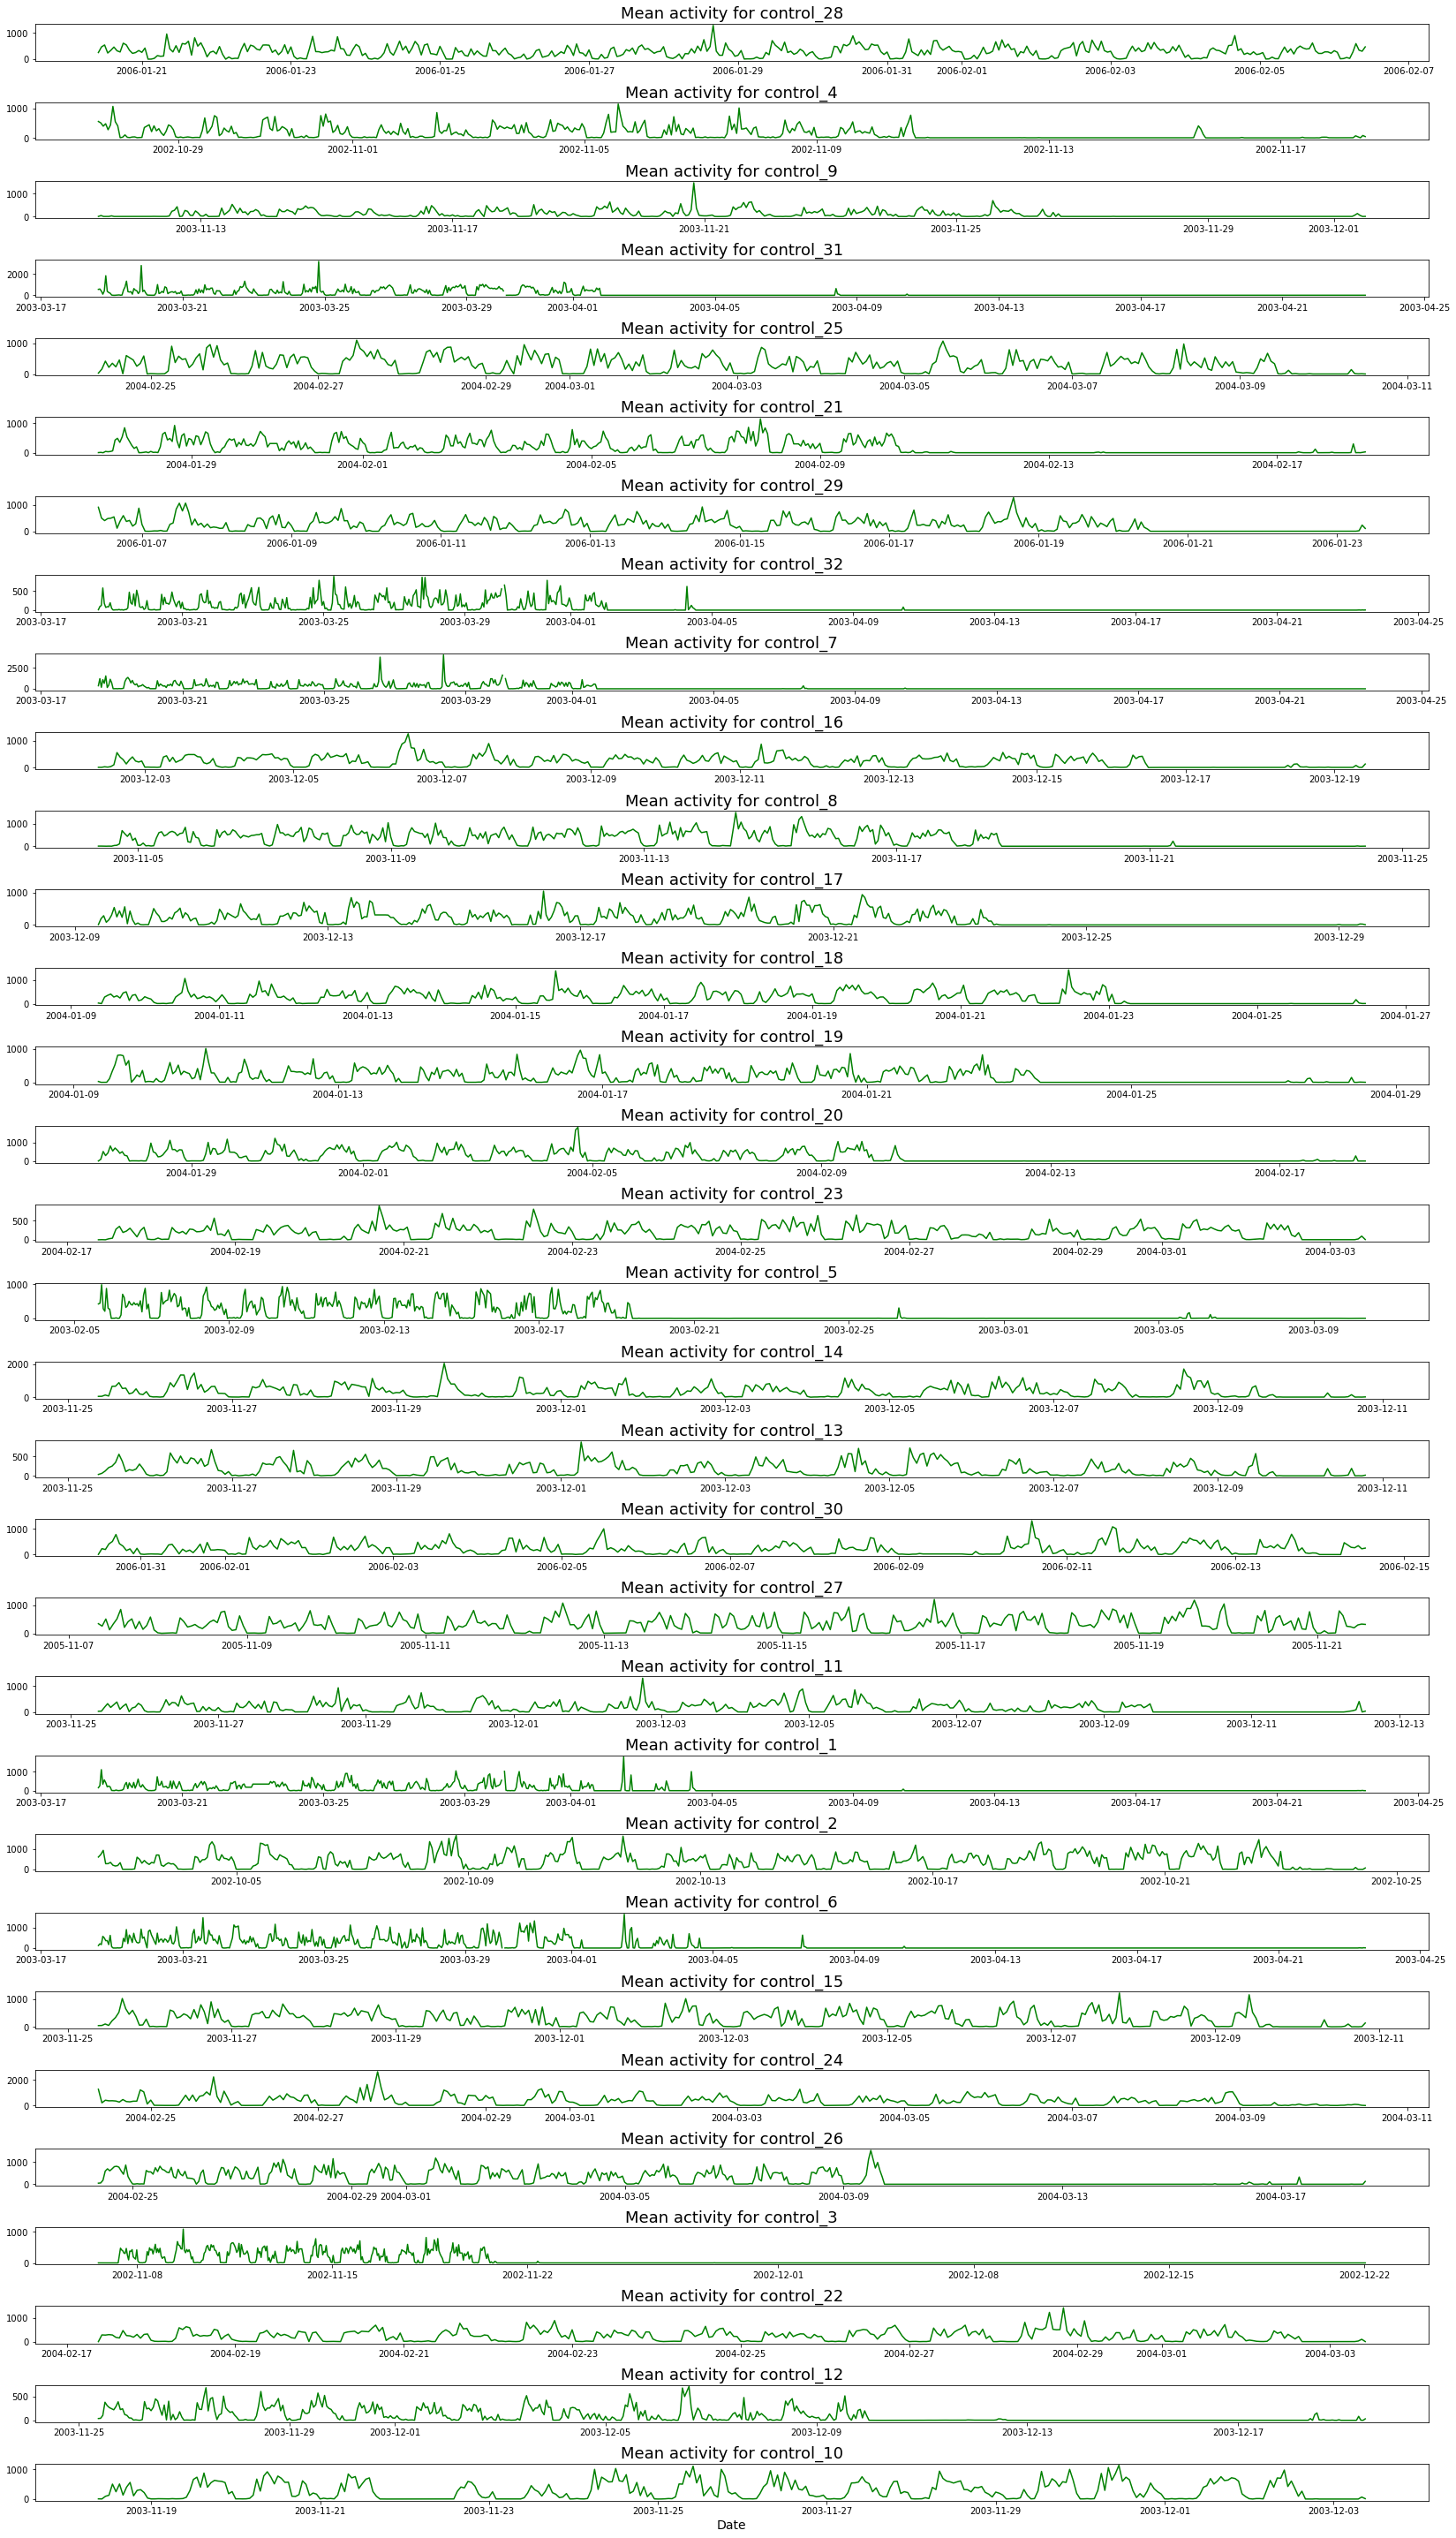

In [28]:
fig, axes = plt.subplots(32, 1, figsize=(23, 40))
cnt = 0
for i in range(32):
    control = controls[cnt]
    axes[i].plot(control.index, control.mean_activity, color='g')
    axes[i].set_title(f'Mean activity for {control.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of control group.jpg', dpi=100)
plt.show()

In [37]:
def to_clock(x):
    d = datetime.strptime(f'{x}:00', '%H:%M')
    return d.strftime('%I:%M %p')

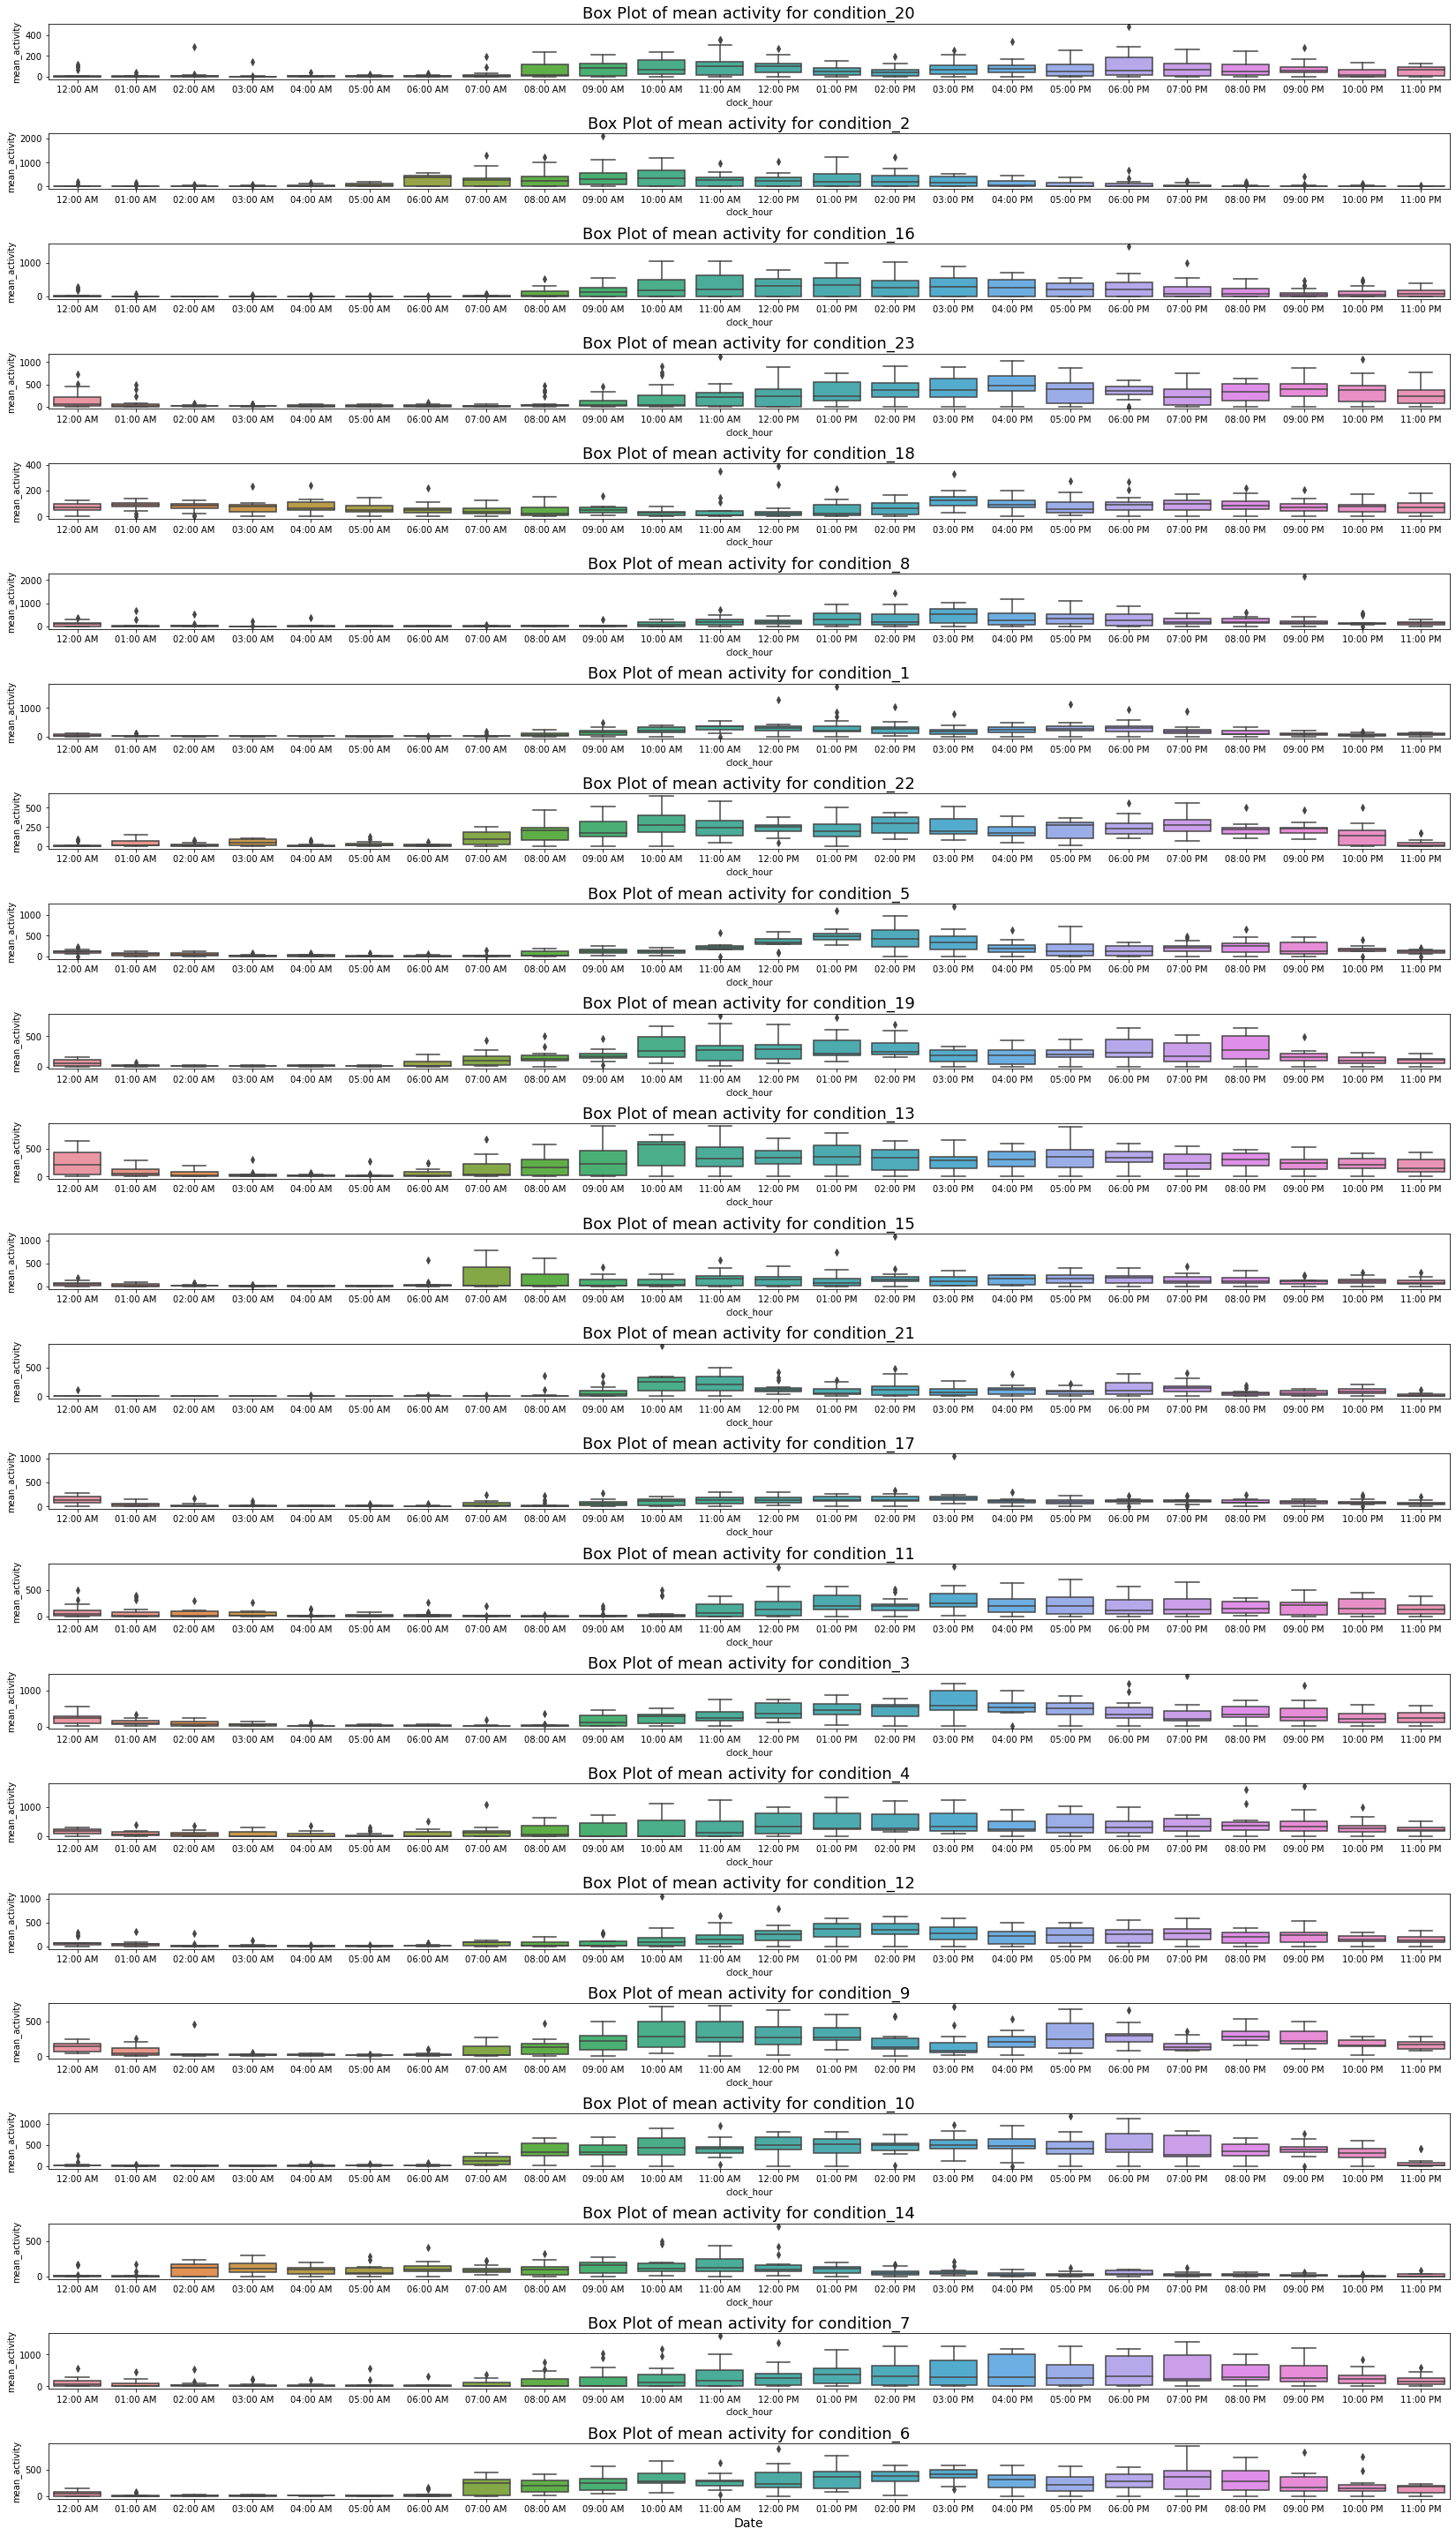

In [38]:
# Draw Plot
fig, axes = plt.subplots(23, 1, figsize=(23, 40))

cnt = 0
for i in range(23):
    df = conditions[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

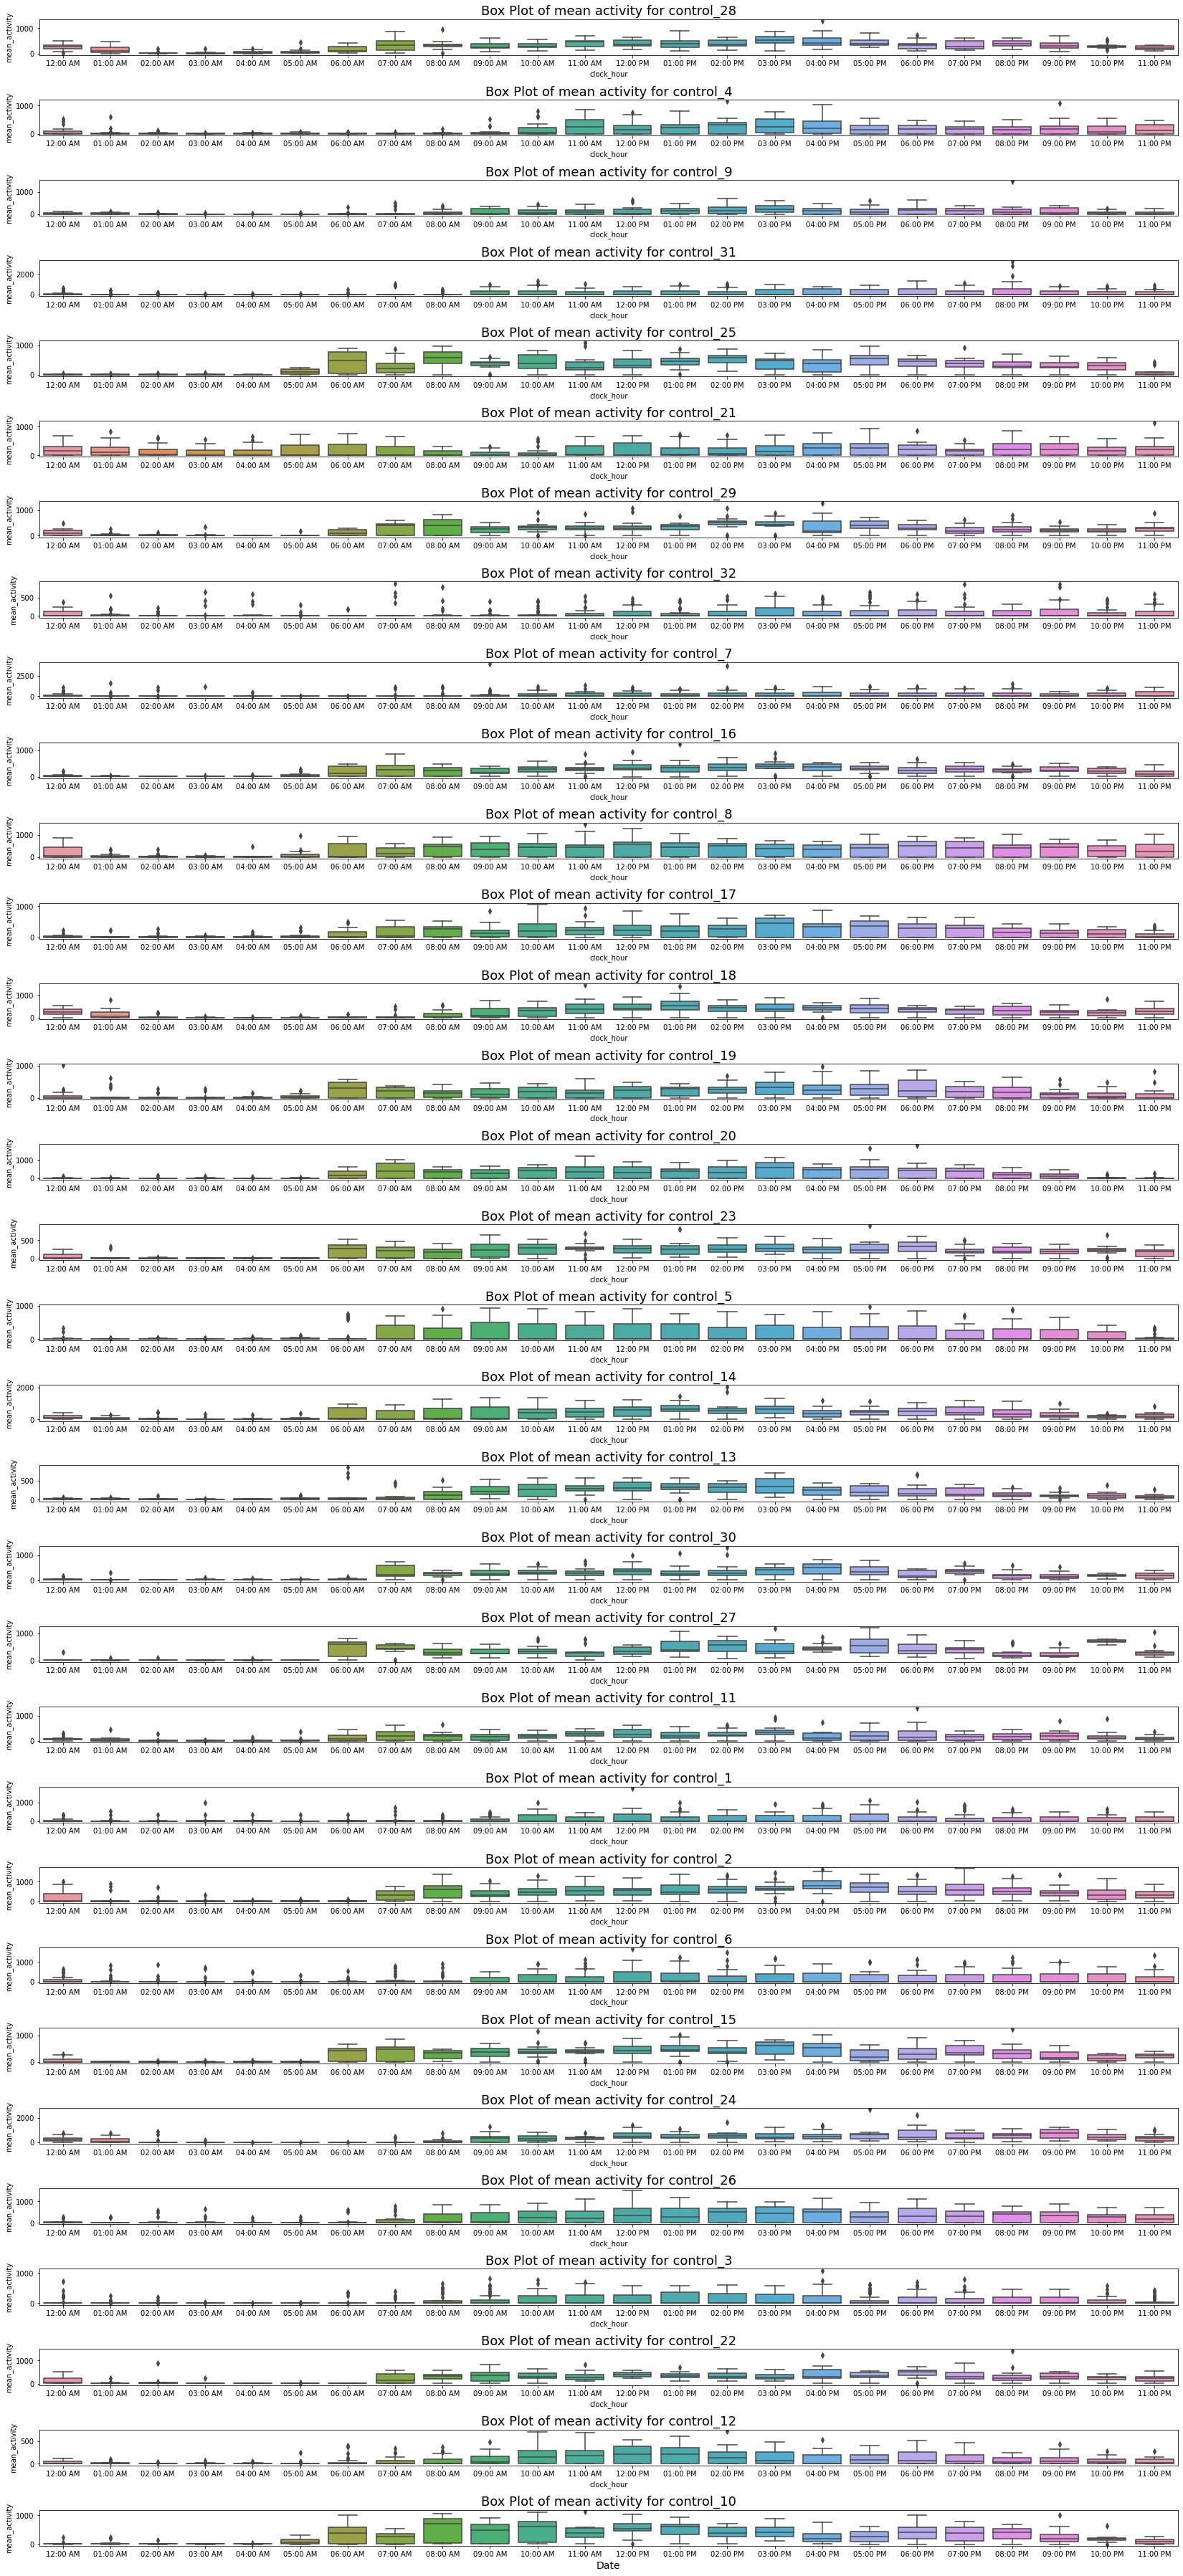

In [48]:
# Draw Plot
fig, axes = plt.subplots(32, 1, figsize=(23, 50))

cnt = 0
for i in range(32):
    df = controls[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

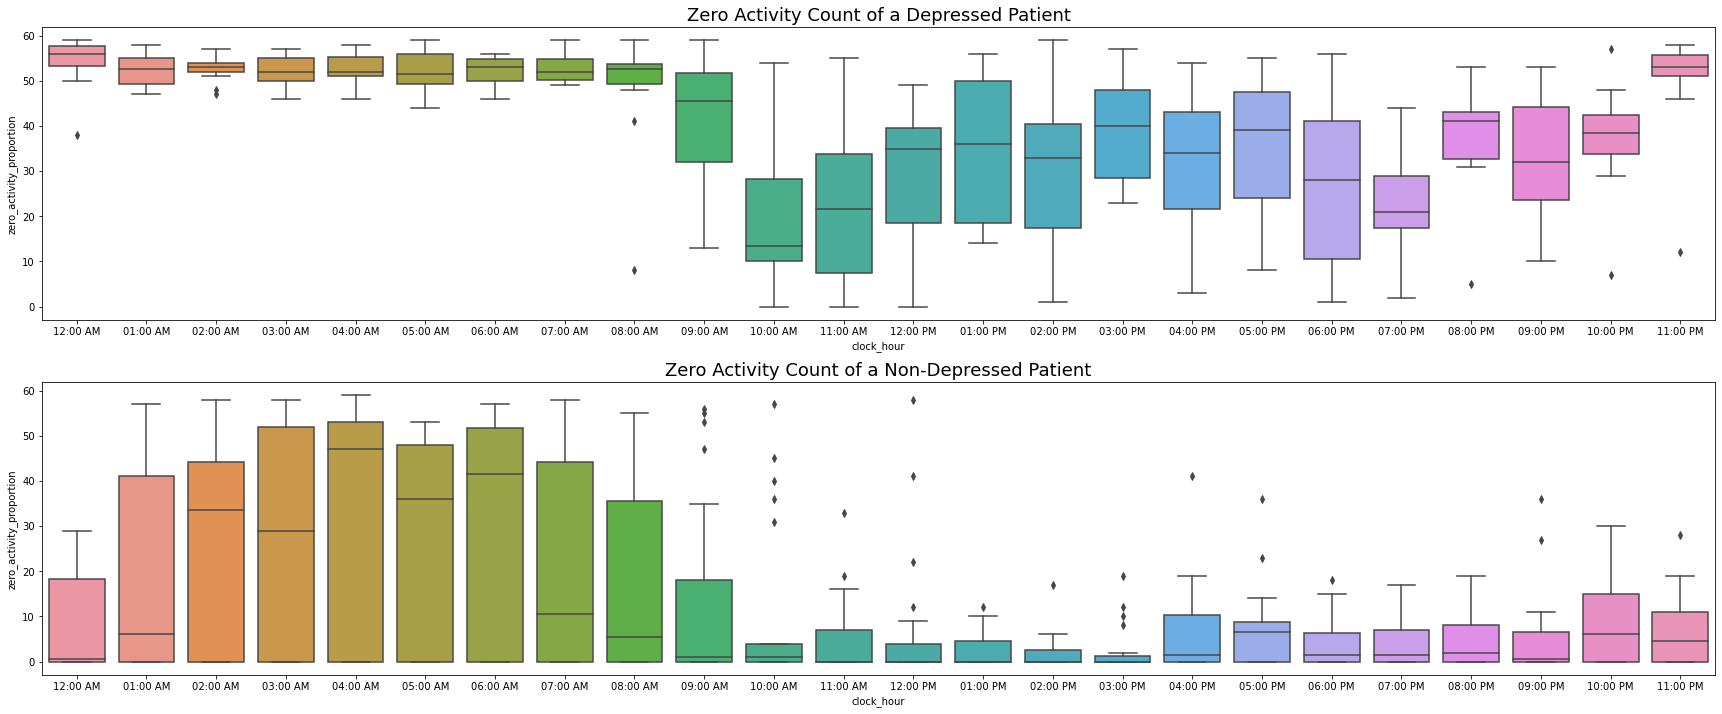

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(24, 10))
df = conditions[12].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[0])
axes[0].set_title('Zero Activity Count of a Depressed Patient', fontsize=18)

df = controls[2].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[1])
axes[1].set_title('Zero Activity Count of a Non-Depressed Patient', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()

## Modeling

In [87]:
def nextday(dates):
    for date in dates:
        yield date

In [58]:
def zero_count(series):
    return list(series).count(0)

In [88]:
def extractfeatures(X, date):
    mask = X['date'] == date
    d = {
        'mean_log_activity': X[mask]['log_activity'].mean(),
        'std_log_activity': X[mask]['log_activity'].std(),
        'min_log_activity': X[mask]['log_activity'].min(),
        'max_log_activity': X[mask]['log_activity'].max(),
        'zero_proportion_activity': zero_count(X[mask]['log_activity'])
    }
    return d

In [89]:
class ExtractData(BaseEstimator, TransformerMixin):
    
    def __init__(self, path):
        self.path = path
        self.X = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        dirs = os.listdir(self.path)
        
        for filepath in sorted(dirs, key=lambda x: x.split('_')[0]):
            condition = filepath.split('.')[0]
            if filepath.endswith('.csv'):
                X = pd.read_csv(self.path + filepath)
                X['log_activity'] = np.log(X['activity'] + 1)
                dates = X.date.unique()
                
                for date in nextday(dates):
                    d = extractfeatures(X, date)
                    d['source'] = condition
                    self.X.append(d)
                

        return pd.DataFrame(self.X)

In [90]:
e = ExtractData(path='/kaggle/input/the-depression-dataset/data/condition/')
conditions = e.fit_transform(X=None, y=None)
conditions['state'] = 1

In [92]:
conditions.tail()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
400,2.383962,2.659121,0.0,8.047190,733,condition_6,1
401,2.890593,2.745717,0.0,7.580189,602,condition_6,1
402,3.400727,2.788079,0.0,8.047190,529,condition_6,1
403,1.669743,2.590492,0.0,7.767264,989,condition_6,1
404,0.228577,1.027840,0.0,6.502790,523,condition_6,1


In [93]:
e = ExtractData(path='/kaggle/input/the-depression-dataset/data/control/')
controls = e.fit_transform(X=None, y=None)
controls['state'] = 0

In [94]:
full_df = controls.append(conditions, ignore_index=True)
full_df.head()

,mean_log_activity,std_log_activity,min_log_activity,max_log_activity,zero_proportion_activity,source,state
0,5.232499,1.494106,0.0,7.976595,24,control_28,0
1,4.103117,2.658716,0.0,8.657129,359,control_28,0
2,4.057168,2.617790,0.0,8.007367,366,control_28,0
3,4.094460,2.587575,0.0,7.852050,350,control_28,0
4,4.118694,2.542314,0.0,8.100768,344,control_28,0


In [95]:
full_df.shape

(1144, 7)

In [96]:
full_df = full_df.sample(frac=1) # reshufle the dataset

In [97]:
def custom_train_test_split(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set.label
    X_test = test_set.drop('label', axis=1)
    y_test = test_set.label
    
    return X_train, X_test, y_train, y_test

In [98]:
class CustomClassifierCV(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_clf):
        self.base_clf = base_clf
    
    def fit(self, X, y=None):
        X['label'] = y
        participants = X.source.unique()
        folds = []
        
        predictions = [] # predicted labels
        actuals = [] # actual labels
            
        for p in participants:
            folds.append(X[X['source'] == p])
        
        for i in range(len(folds)):   
            test_set = folds[i]
            train_fold = [elem for idx , elem in enumerate(folds) if idx != i]
            
            train_set = pd.concat(train_fold)
            X_train, X_test, y_train, y_test = custom_train_test_split(train_set.drop(['source'], axis=1),
                                    test_set.drop(['source'], axis=1))
            
            self.base_clf.fit(X_train, y_train)
            predictions.append(self.predict(X_test))
            actuals.append(test_set.label.iloc[0])
            
        self.score(predictions, actuals)
        
    def predict(self, X):
        predictions = self.base_clf.predict(X)
        ones = predictions.tolist().count(1)
        zeroes = predictions.tolist().count(0)
        
        return 1 if ones > zeroes else 0
    
    def score(self, predictions, actuals):
        print(classification_report(predictions, actuals))

In [99]:
X = full_df.drop(['state'], axis=1)
y = full_df.state

In [100]:
forest = RandomForestClassifier(n_estimators=100)
custom_clfCV = CustomClassifierCV(forest)
custom_clfCV.fit(X, y)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79        44
           1       0.39      0.82      0.53        11

    accuracy                           0.71        55
   macro avg       0.66      0.75      0.66        55
weighted avg       0.83      0.71      0.74        55

